# Лабораторная работа №4: "Линейные модели, SVM и деревья решений".

Загрузка датасета


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv('sample_data/cleaned_all_phones.csv')
data.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

**Чистка данных**

In [34]:
# проверим есть ли пропущенные значения
data.isnull().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

In [35]:
data[['width', 'height']] = data.resolution.str.split('x', expand = True).astype('int64')

data.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),width,height
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,True,False,False,False,False,False,120.0,720,1280
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,False,True,False,False,False,False,False,100.0,720,1280
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,False,True,False,False,False,False,False,420.0,1080,1920
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,False,True,False,True,False,False,False,150.0,1080,1920
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,False,True,True,False,False,False,False,420.0,1080,1920


In [36]:
data['announcement_year'] = data.announcement_date.apply(lambda x: x.split('-')[0]).astype('int64')
data.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),width,height,announcement_year
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,True,False,False,False,False,False,120.0,720,1280,2016
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,False,False,False,100.0,720,1280,2016
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,False,False,False,420.0,1080,1920,2017
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,True,False,False,False,150.0,1080,1920,2017
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,False,False,False,420.0,1080,1920,2017


In [37]:
data.drop(columns = ['announcement_date', 'resolution', 'phone_name'], inplace = True)

In [38]:
data.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD),width,height,announcement_year
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036,1035.212963,2207.190476,2020.410053
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821,253.488940,469.734578,1.700190
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000,480.000000,800.000000,2016.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500,720.000000,1647.500000,2019.000000
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000,1080.000000,2400.000000,2021.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000,1080.000000,2400.000000,2022.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000,3840.000000,3840.000000,2023.000000


In [40]:
categorical_cols = list(data.select_dtypes(include='object').columns)
onehot = OneHotEncoder(sparse_output=False)
encoded = onehot.fit_transform(data[categorical_cols])
encoded_cols = onehot.get_feature_names_out()
encoded_df = pd.DataFrame(encoded, columns=encoded_cols)

In [41]:
encoded_df

,brand_Apple,brand_Google,brand_Honor,brand_Huawei,brand_LG,brand_Lenovo,brand_OnePlus,brand_Oppo,brand_Realme,brand_Samsung,...,os_iOS 11,os_iOS 11.1.1,os_iOS 12,os_iOS 13,os_iOS 14.1,os_iOS 15,os_iOS 15.4,os_iOS 16,battery_type_Li-Ion,battery_type_Li-Po
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
final_df = pd.concat([data, encoded_df], axis=1).drop(columns=categorical_cols)

In [43]:
final_df

,inches,battery,ram(GB),weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,...,os_iOS 11,os_iOS 11.1.1,os_iOS 12,os_iOS 13,os_iOS 14.1,os_iOS 15,os_iOS 15.4,os_iOS 16,battery_type_Li-Ion,battery_type_Li-Po
0,5.00,2200,2,140.0,16,True,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.30,2700,2,140.0,16,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.20,3000,4,147.0,16,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5.50,4100,4,165.0,32,True,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.10,3200,4,145.0,32,True,True,True,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,6.64,5000,8,190.0,256,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1508,6.72,5000,8,190.0,128,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1509,6.74,5240,16,205.0,256,True,True,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1510,6.74,4600,24,205.0,1,True,True,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
bool_cols = list(data.select_dtypes(include='bool').columns)
final_df[bool_cols] = final_df[bool_cols].replace({True: 1, False: 0})

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   inches                     1512 non-null   float64
 1   battery                    1512 non-null   int64  
 2   ram(GB)                    1512 non-null   int64  
 3   weight(g)                  1512 non-null   float64
 4   storage(GB)                1512 non-null   int64  
 5   video_720p                 1512 non-null   int64  
 6   video_1080p                1512 non-null   int64  
 7   video_4K                   1512 non-null   int64  
 8   video_8K                   1512 non-null   int64  
 9   video_30fps                1512 non-null   int64  
 10  video_60fps                1512 non-null   int64  
 11  video_120fps               1512 non-null   int64  
 12  video_240fps               1512 non-null   int64  
 13  video_480fps               1512 non-null   int64

In [47]:
print('Признаки, имеющие максимальную по модулю корреляцию с ценой телефона')
best_params = final_df.corr()['price(USD)'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.3]
best_params

Признаки, имеющие максимальную по модулю корреляцию с ценой телефона


storage(GB)    0.354250
width          0.338867
video_4K       0.312411
video_720p     0.310810
Name: price(USD), dtype: float64

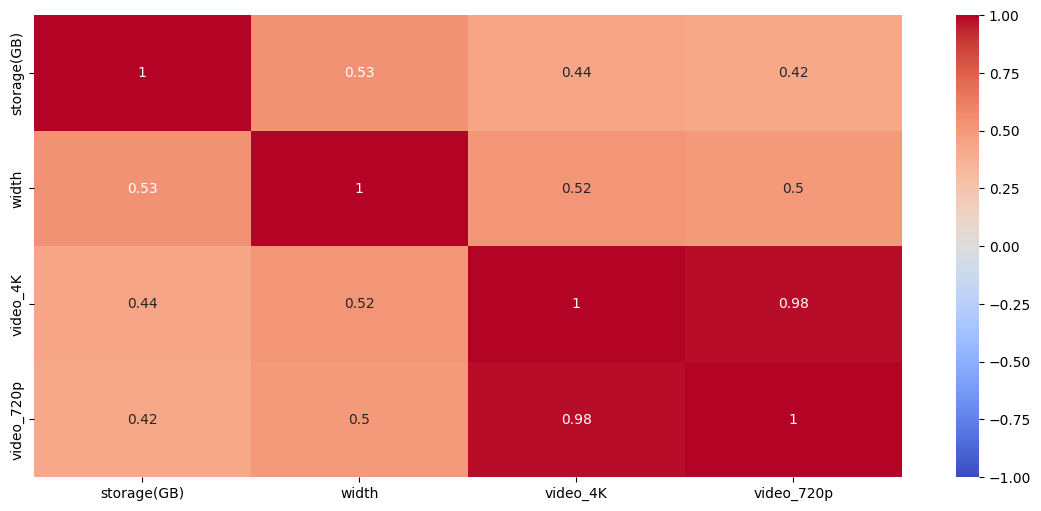

In [48]:
plt.figure(figsize=(14, 6))
sns.heatmap(final_df[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

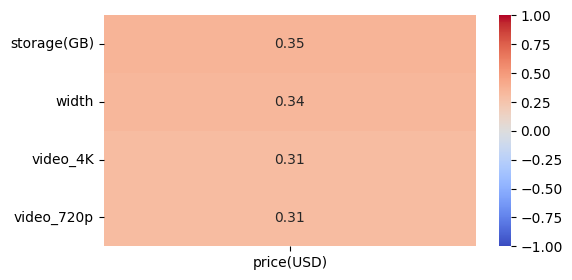

In [49]:
plt.figure(figsize=(6, 3))
sns.heatmap(pd.DataFrame(data[np.append(best_params.index.values, 'price(USD)')].corr()['price(USD)'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

**Разделение выборки на обучающую и тестовую**




In [50]:
y = data['price(USD)']
X = data[best_params.index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

**Линейная регрессия**

In [53]:
def print_metrics(y_test, y_pred):
    # коэффициент детерминации
    print(f"R^2: {r2_score(y_test, y_pred)}")
    # среднеквадратичная ошибка
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    # средняя абсолютная ошибка
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [52]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print_metrics(y_test, y_pred_linear)

R^2: 0.13510555261347457
MSE: 66433.49914733712
MAE: 163.7848199812498


**Полиноминальная регрессия**

In [54]:
poly_model = PolynomialFeatures(degree=3)
x_train_poly = poly_model.fit_transform(x_train)
x_test_poly = poly_model.fit_transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
y_pred_poly = linear_model.predict(x_test_poly)
print_metrics(y_test, y_pred_poly)

R^2: -0.8520645814281242
MSE: 142259.12903350135
MAE: 179.1300123620549


**SVM**

In [56]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,storage(GB),width,video_4K,video_720p
count,1.058000e+03,1.058000e+03,1.058000e+03,1.058000e+03
mean,-6.296161e-17,2.518464e-16,-4.533236e-17,-1.645397e-16
std,1.000473e+00,1.000473e+00,1.000473e+00,1.000473e+00
min,-1.494791e+00,-2.105589e+00,-1.046446e+00,-1.058414e+00
25%,-6.287640e-01,-1.089096e+00,-1.046446e+00,-1.058414e+00
50%,2.510093e-01,1.532854e-01,9.556154e-01,9.448098e-01
75%,2.510093e-01,1.532854e-01,9.556154e-01,9.448098e-01
max,5.529649e+00,1.054411e+01,9.556154e-01,9.448098e-01


In [57]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
svm_model = SVR(kernel='linear')
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 8.0}


In [58]:
best_svm_model = grid_cv.best_estimator_
best_svm_model = SVR(kernel='linear', C=8)
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.09028888194733287
MSE: 69875.91719208499
MAE: 145.91318982938506


**Дерево решений**


In [59]:
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 13}


In [60]:
best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

R^2: 0.17201798017858494
MSE: 63598.21475791498
MAE: 152.63921401566597


In [62]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

width: 0.698
video_720p: 0.197
storage(GB): 0.104
video_4K: 0.0


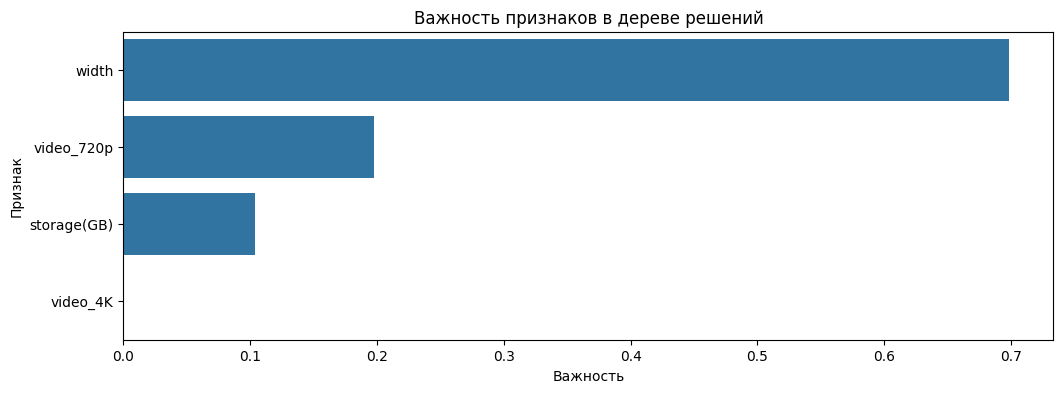

In [63]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

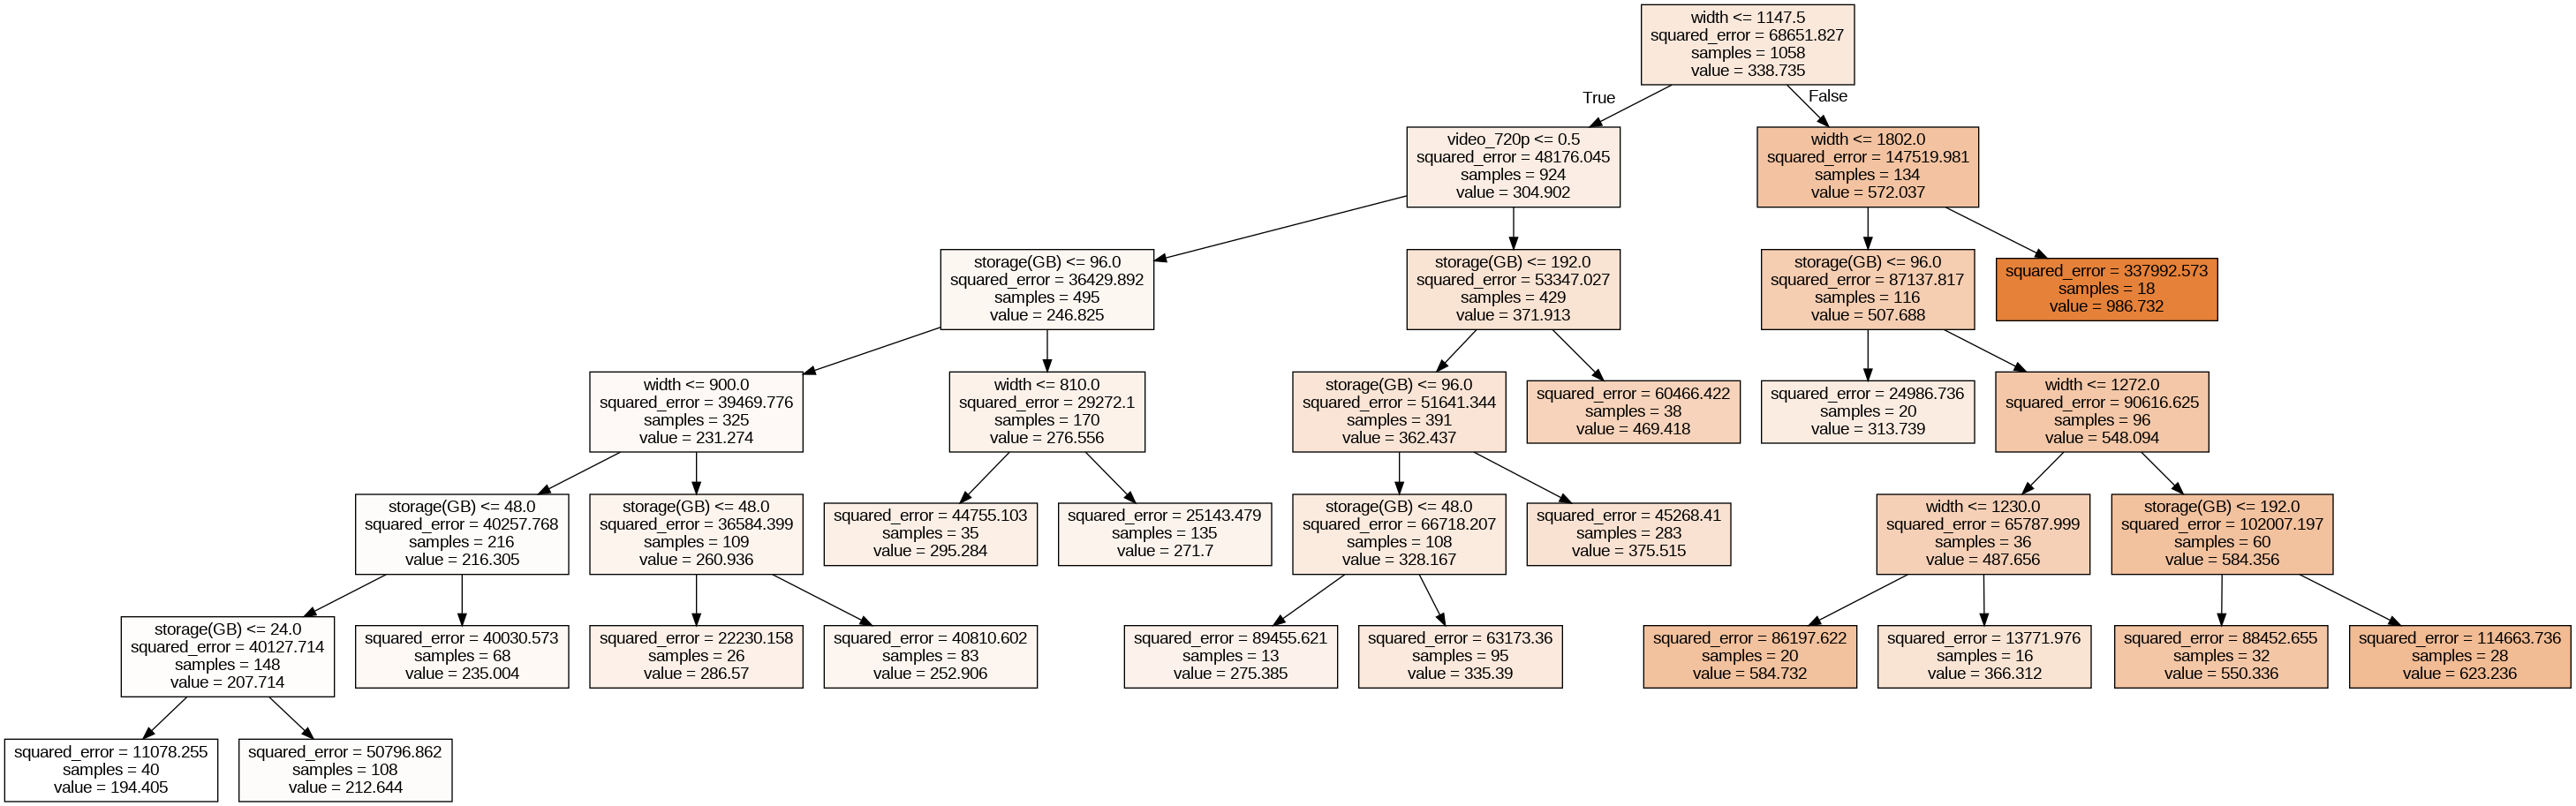

In [64]:
export_graphviz(best_tree, feature_names=best_params.index, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png
Image(filename='tree.png')

In [65]:
print('Линейная регрессия')
print_metrics(y_test, y_pred_linear)

print('\nПолиномиальная регрессия')
print_metrics(y_test, y_pred_poly)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Линейная регрессия
R^2: 0.13510555261347457
MSE: 66433.49914733712
MAE: 163.7848199812498

Полиномиальная регрессия
R^2: -0.8520645814281242
MSE: 142259.12903350135
MAE: 179.1300123620549

Метод опорных векторов
R^2: 0.09028888194733287
MSE: 69875.91719208499
MAE: 145.91318982938506

Дерево решений
R^2: 0.17201798017858494
MSE: 63598.21475791498
MAE: 152.63921401566597
